In [1]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical computations
import matplotlib.pyplot as plt # For plotting and visualizing data
import re # For working with regular expressions

import nltk # Natural Language Toolkit for text preprocessing
from nltk.corpus import stopwords # List of common stopwords (e.g., "the", "is", etc.)
from nltk.stem.porter import PorterStemmer # For stemming words to their root form

from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical features
from sklearn.model_selection import train_test_split # To split dataset into training and testing
from sklearn.ensemble import RandomForestClassifier # A machine learning model (ensemble method)
from sklearn.metrics import accuracy_score # To evaluate model accuracy
from sklearn.metrics import classification_report # To get precision, recall, F1-score etc.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # For confusion matrix and visualization

In [2]:
senti=pd.read_csv('train.csv') # To read the training dataset (CSV file) into a pandas DataFrame called 'senti'

In [3]:
senti.head() # To display the first 5 rows of the dataset to inspect its structure

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
senti.shape # To output the shape (rows, columns) of the DataFrame

(27481, 4)

In [5]:
nltk.download('stopwords') # To download the list of English stopwords
print(stopwords.words('english')) # To print the list to verify

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
senti.isnull().sum() # To count missing (NaN) values for each column

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [7]:
senti=senti.dropna() # To remove rows with any missing values

In [8]:
senti.isnull().sum() # To recheck to ensure no missing values remain

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [9]:
x=senti.drop(columns=['text','textID'],axis=1) # To drop columns not used in modeling
print(x) # To print resulting DataFrame

                                           selected_text sentiment
0                    I`d have responded, if I were going   neutral
1                                               Sooo SAD  negative
2                                            bullying me  negative
3                                         leave me alone  negative
4                                          Sons of ****,  negative
...                                                  ...       ...
27476                                             d lost  negative
27477                                      , don`t force  negative
27478                          Yay good for both of you.  positive
27479                         But it was worth it  ****.  positive
27480  All this flirting going on - The ATG smiles. Y...   neutral

[27480 rows x 2 columns]


In [10]:
porter=PorterStemmer() # To create a PorterStemmer object for stemming words

In [11]:
stop_words=set(stopwords.words('english')) # To convert stopwords to a set for faster lookup

def stemming(selected_text): # Function to clean and stem text
    new_text=re.sub('[^a-zA-Z]',' ',selected_text) # To remove non-letter characters
    new_text=new_text.lower() # To convert to lowercase
    new_text=new_text.split() # To split into words
    new_text=[porter.stem(word) for word in new_text if word not in stop_words] # To stem and remove stopwords
    new_text=' '.join(new_text) # To rejoin words into a single string
    return new_text

In [12]:
senti['selected_text']=senti['selected_text'].apply(stemming) # To apply preprocessing to 'selected_text'

In [13]:
print(senti['selected_text']) # To print the stemmed version of selected text

0                        respond go
1                          sooo sad
2                             bulli
3                         leav alon
4                               son
                    ...            
27476                          lost
27477                          forc
27478                      yay good
27479                         worth
27480    flirt go atg smile yay hug
Name: selected_text, Length: 27480, dtype: object


In [14]:
X=senti['selected_text'].values # Feature: processed text
Y=senti['sentiment'].values # Label: sentiment

In [15]:
print(X) # To print feature values                                     

['respond go' 'sooo sad' 'bulli' ... 'yay good' 'worth'
 'flirt go atg smile yay hug']


In [16]:
print(Y) # To print target sentiment labels

['neutral' 'negative' 'negative' ... 'positive' 'positive' 'neutral']


In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3) # 60% train, 40% test

In [18]:
print(X.shape,X_train.shape,X_test.shape) # To display shapes of full, train, and test datasets

(27480,) (19236,) (8244,)


In [19]:
print(X_train) # To print training feature data

['soooo romant ev' 'good' 'got slow cooker go get readi work' ...
 'congratul' 'bah' 'n amaz']


In [20]:
print(X_test) # To print test feature data

['good person' 'eat breakfast get readi go school' '' ...
 'know two categori websit tri remov one' 'leav fraser alon' 'damp']


In [21]:
vector=TfidfVectorizer() # To create TF-IDF vectorizer object
vector.fit(X) # To learn vocabulary from all data
X_train=vector.transform(X_train) # To transform training data into vectors
X_test=vector.transform(X_test) # To transform test data

In [22]:
print(X_train) # To print sparse matrix of training data

  (0, 3709)	0.6169421905221667
  (0, 9684)	0.6288709218402763
  (0, 10610)	0.47318463332770183
  (1, 4663)	1.0
  (2, 2425)	0.604496765546235
  (2, 4520)	0.25687799424430735
  (2, 4629)	0.2445521357320543
  (2, 4715)	0.2924291988174562
  (2, 9319)	0.38129316693302967
  (2, 10452)	0.4528760599512379
  (2, 12905)	0.2698065386128682
  (3, 1912)	0.5615170344146132
  (3, 4874)	0.5219265747725319
  (3, 7147)	0.6420991127609745
  (4, 810)	0.30178153060122975
  (4, 1058)	0.6317872355906194
  (4, 4629)	0.24574908083472163
  (4, 5139)	0.39525449225454434
  (4, 10341)	0.42106080226383263
  (4, 11504)	0.34038488972216685
  (5, 1089)	0.2686277826677664
  (5, 1351)	0.27954829285485067
  (5, 3289)	0.3178204018898771
  (5, 3368)	0.4364572748228941
  (5, 4520)	0.20536963548317078
  :	:
  (19225, 1089)	1.0
  (19226, 2806)	0.14863868562379287
  (19226, 3594)	0.21970834935526481
  (19226, 4562)	0.38047194360529474
  (19226, 5036)	0.16133463522521627
  (19226, 6615)	0.1628361621347048
  (19226, 6865)	0.2587

In [23]:
print(X_test) # To print sparse matrix of test data

  (0, 4663)	0.4950183249004487
  (0, 8584)	0.8688825340704885
  (1, 1430)	0.5102168678481888
  (1, 3420)	0.442509647709746
  (1, 4520)	0.29774808681670045
  (1, 4629)	0.283461145651525
  (1, 9319)	0.4419581027350157
  (1, 9947)	0.4237131701714795
  (3, 11452)	1.0
  (4, 1311)	1.0
  (5, 471)	0.4177334853150767
  (5, 1285)	0.5201216130259342
  (5, 5842)	0.48970941050272987
  (5, 5849)	0.5613884004634295
  (6, 6615)	0.2191081259190278
  (6, 7982)	0.31450482856241313
  (6, 11705)	0.2810090073912082
  (6, 12095)	0.41732884849885565
  (6, 12519)	0.23760250415974885
  (6, 12962)	0.6663692652028297
  (6, 13141)	0.3153505420208806
  (7, 5385)	0.6206750381514561
  (7, 11158)	0.7840679160734026
  (8, 3772)	1.0
  (9, 890)	0.5556315214529135
  :	:
  (8230, 2427)	1.0
  (8231, 6316)	1.0
  (8232, 9926)	1.0
  (8233, 1079)	1.0
  (8234, 4663)	1.0
  (8235, 697)	0.8101440912174257
  (8235, 1744)	0.5862308005090584
  (8236, 4031)	1.0
  (8237, 5054)	0.8941872955552952
  (8237, 12905)	0.44769306502056433
  (82

In [24]:
model=RandomForestClassifier(n_estimators=100)# To initialize with 100 decision trees
model.fit(X_train, Y_train)# To train model on training data

RandomForestClassifier()

Accuracy of training data:  0.9787897691827823


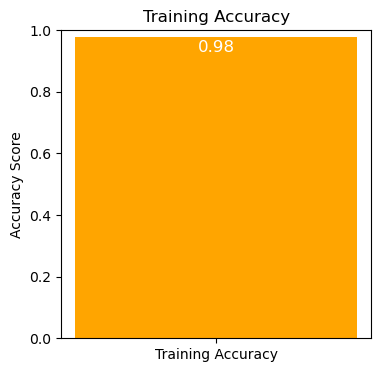

In [25]:
X_train_pred=model.predict(X_train) # To use the trained model to predict labels for the training data
train_accuracy=accuracy_score(X_train_pred,Y_train) # To calculate training accuracy by comparing predicted and actual labels
print('Accuracy of training data: ',train_accuracy) # To print the computed accuracy score to the console
plt.figure(figsize=(4,4)) # To create a new figure for the plot with width and height=4 inches
plt.bar(['Training Accuracy'],[train_accuracy],color='orange') # To draw a bar chart with a single bar for training accuracy
plt.ylim(0,1) # To set the y-axis limits from 0 to 1 since accuracy is a ratio
plt.ylabel("Accuracy Score") # To label the y-axis
plt.title("Training Accuracy") # To add a title to the bar chart
plt.text(0,train_accuracy-0.05,f"{train_accuracy:.2f}",fontsize=12,color='white',ha='center') # To add a text label above the bar to show the exact accuracy value with 2 decimal places
plt.show() # To display the final plot

Accuracy of testing data:  0.8064046579330422


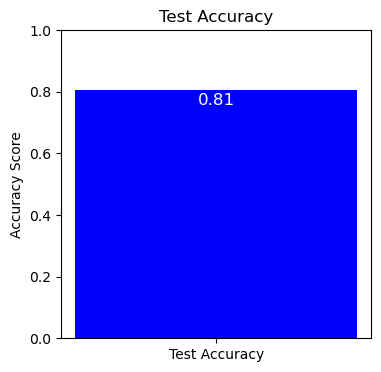

In [26]:
X_test_pred=model.predict(X_test) # To use the trained model to predict sentiment labels for the test data
test_accuracy=accuracy_score(X_test_pred,Y_test) # To calculate test accuracy by comparing predictions to true labels
print('Accuracy of testing data: ',test_accuracy) # To rint the test accuracy to the console
plt.figure(figsize=(4, 4)) # To create a new figure for plotting with 4x4 inch dimensions
plt.bar(['Test Accuracy'],[test_accuracy],color='blue')# To create a bar chart showing test accuracy in blue
plt.ylim(0,1) # To set the vertical axis (y-axis) limits between 0 and 1
plt.ylabel("Accuracy Score") # To label the y-axis as "Accuracy Score"
plt.title("Test Accuracy") # To add a title to the chart
plt.text(0,test_accuracy-0.05,f"{test_accuracy:.2f}",fontsize=12,color='white',ha='center') # To add a text label above the bar to show the exact accuracy value with 2 decimal places
plt.show() # To render and display the final plot

In [27]:
Y_pred = model.predict(X_test) # To use the trained model to predict sentiment labels on the test dataset
print("Classification Report:\n") # To print a heading to indicate the following output is a classification report
print(classification_report(Y_test,Y_pred)) # To print precision, recall, F1-score, and support for each class

Classification Report:

              precision    recall  f1-score   support

    negative       0.77      0.75      0.76      2355
     neutral       0.78      0.86      0.82      3322
    positive       0.89      0.79      0.83      2567

    accuracy                           0.81      8244
   macro avg       0.81      0.80      0.80      8244
weighted avg       0.81      0.81      0.81      8244



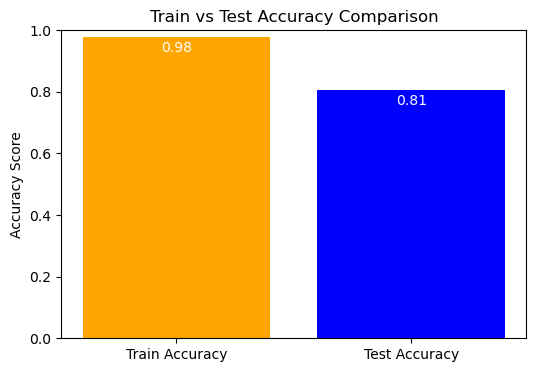

In [28]:
plt.figure(figsize=(6,4)) # To create a new plot with width 6 inches and height 4 inches
plt.bar(['Train Accuracy','Test Accuracy'],[train_accuracy, test_accuracy],color=['orange', 'blue']) # To plots two bars:One for training accuracy(train_accuracy) in orange and One for test accuracy(test_accuracy) in blue
plt.ylim(0,1) # To set the vertical axis (y-axis) to range from 0 to 1(0% to 100% accuracy)
plt.ylabel("Accuracy Score") # To add a label to the y-axis
plt.title("Train vs Test Accuracy Comparison") # To add a descriptive title to the chart
plt.text(0, train_accuracy - 0.05, f"{train_accuracy:.2f}", ha='center', color='white') # To add a label on(or slightly below)the training accuracy bar with the exact value 
plt.text(1, test_accuracy - 0.05, f"{test_accuracy:.2f}", ha='center', color='white') # To add a label on(or slightly below)the training accuracy bar with the exact value
plt.show() # To render and display the final chart

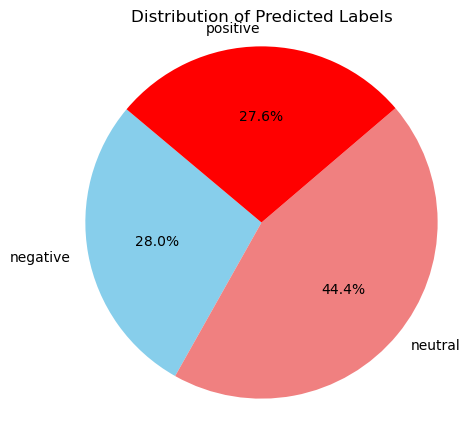

In [29]:
labels,counts=np.unique(Y_pred,return_counts=True) # To count how many times each label appears and requency of each class in predictions
plt.figure(figsize=(5,5)) # To create a new square figure for the pie chart (5x5 inches)
plt.pie(counts,labels=labels,autopct='%1.1f%%',startangle=140,colors=['skyblue','lightcoral','red']) # To draw a pie chart depicting distribution of predicted labels
plt.title("Distribution of Predicted Labels") # To add a title to explain the pie chart
plt.axis('equal') # To ensure the pie chart is drawn as a circle (equal aspect ratio)
plt.show() # To render and display the pie chart

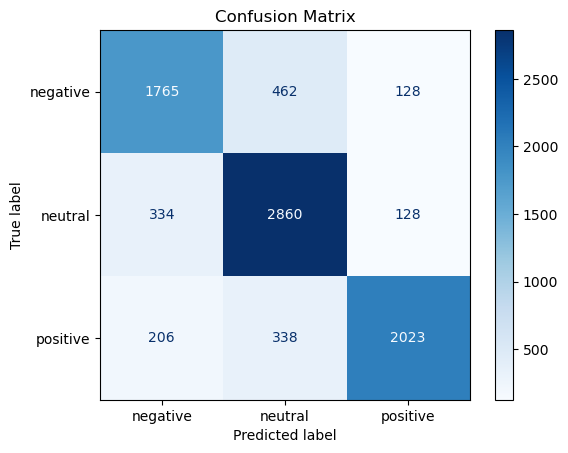

In [30]:
cm=confusion_matrix(Y_test, Y_pred) # To compute the confusion matrix
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_) # To create a ConfusionMatrixDisplay object for plotting.
disp.plot(cmap=plt.cm.Blues) # To render the confusion matrix as a heatmap using a blue color gradient 
plt.title("Confusion Matrix") # To add a title above the plot
plt.show() # To display the final confusion matrix plot

In [31]:
#Predict sentiment for custom user input
def predict_sentiment(user_input):
    # Preprocess the input like the training data
    processed_input=stemming(user_input)
    vectorized_input=vector.transform([processed_input])
    prediction=model.predict(vectorized_input)[0]
    # Return the predicted sentiment label
    return f"{prediction.capitalize()}😊" if prediction=='positive' else(
           f"{prediction.capitalize()}😐" if prediction=='neutral' else
           f"{prediction.capitalize()}😞")

In [69]:
#To ask for user input
print("\nSentiment Prediction(Type'exit'to quit)\n")
while True:
    try:
        user_input=input("Enter a sentence: ") # To take input from user
        if user_input.lower()=='exit': # To exit loop if 'exit'
            print("Goodbye!👋")
            break
        result=predict_sentiment(user_input) # To predict sentiment
        print("Predicted Sentiment:",result)
        print("-"*40)
    except Exception as e:
        print("Something went wrong:",e)


Sentiment Prediction(Type'exit'to quit)



Enter a sentence:  I love it


Predicted Sentiment: Positive😊
----------------------------------------


Enter a sentence:  I hate it


Predicted Sentiment: Negative😞
----------------------------------------


Enter a sentence:  The sun rises in the east


Predicted Sentiment: Neutral😐
----------------------------------------


Enter a sentence:  exit


Goodbye!👋


DEBARATI_GHOSH